In [10]:
import xarray as xr
import sys, os
from sklearn.metrics import mean_squared_error
import numpy as np

# Local Imports
curdir = os.getcwd()
#print(curdir)
sys.path.insert(0, curdir+"/../data_processing")
from ceres_ebaf import *

sys.path.insert(0, curdir+"/../visualization")
from ceres_ebaf_plotting import *

In [2]:
file_name = "/Users/mawa7160/dev/data/CERES/EBAF/CERES_EBAF-TOA_Full_2022_01.nc"
ceres_ds = xr.open_dataset(file_name)
ceres_full_years = ceres_ds
solar_full_data = ceres_full_years["solar_mon"]

In [45]:
def calculate_optimal_ly_and_nly(ly_list, nly_list, start_month="01", print_out=True):
    errors = np.ones((len(ly_list), len(nly_list)))
    for i in range(len(ly_list)):
        for j in range(len(nly_list)):
            solar_optimal = create_hemisphere_data(solar_full_data, start_yr="2001", start_mon=start_month, 
                end_yr="2022", end_mon=start_month, time_weighting=1, space_weighting=1, 
                ly_feb=ly_list[i], nly_feb=nly_list[j])
            errors[i,j] = mean_squared_error(solar_optimal["nh"], solar_optimal["sh"])

    [i,j] = np.unravel_index(errors.argmin(), errors.shape)
    if(print_out):
        print("Minimum Error is: ", np.min(errors))
        print("Located at: Non-Leap Feb =", nly_list[j], " Leap Year Feb =", ly_list[i])
    return(i,j)

In [46]:
def grid_search_ly_nly_febs(start_month, full_depth=False):
    leap_year_febs = np.arange(27, 30, 0.25)
    non_leap_year_febs = np.arange(27, 30, 0.25)
    [i,j] = calculate_optimal_ly_and_nly(leap_year_febs, non_leap_year_febs, start_month=start_month, print_out=False)
    found_ly = leap_year_febs[i]
    found_nly = non_leap_year_febs[j]

    # Second (Refined) Search
    non_leap_year_febs = np.arange(found_nly-.25, found_nly+.25, 0.1)
    leap_year_febs = np.arange(found_ly-.25, found_ly+.25, 0.1)
    [i,j] = calculate_optimal_ly_and_nly(leap_year_febs, non_leap_year_febs)
    found_ly = leap_year_febs[i]
    found_nly = non_leap_year_febs[j]

    if(full_depth):
        # Final Refined Search
        non_leap_year_febs = np.arange(found_nly-.05, found_nly+.05, 0.01)
        leap_year_febs = np.arange(found_ly-.05, found_ly+.05, 0.01)
        [i,j] = calculate_optimal_ly_and_nly(leap_year_febs, non_leap_year_febs)
        found_ly = leap_year_febs[i]
        found_nly = non_leap_year_febs[j]

        non_leap_year_febs = np.arange(found_nly-.02, found_nly+.02, 0.005)
        leap_year_febs = np.arange(found_ly-.02, found_ly+.02, 0.005)
        [i,j] = calculate_optimal_ly_and_nly(leap_year_febs, non_leap_year_febs)
        found_ly = leap_year_febs[i]
        found_nly = non_leap_year_febs[j]

## Grid Search

In [5]:
for i in range(9):
    month = "0"+str(i+1)
    print("For month ", month)
    grid_search_ly_nly_febs(month)
    print("")

for i in range(3):
    print("For month ", str(i+10))
    grid_search_ly_nly_febs(str(i+10))
    print("")

For month  01
Minimum Error is:  0.00016385926672212809
Located at: Non-Leap Feb = 28.450000000000003  Leap Year Feb = 27.650000000000006

For month  02
Minimum Error is:  0.0008205354257144588
Located at: Non-Leap Feb = 28.450000000000003  Leap Year Feb = 27.75

For month  03
Minimum Error is:  0.02776275106684148
Located at: Non-Leap Feb = 28.150000000000006  Leap Year Feb = 28.25

For month  04
Minimum Error is:  0.12158579036971022
Located at: Non-Leap Feb = 28.150000000000006  Leap Year Feb = 29.25

For month  05
Minimum Error is:  0.2716518503500763
Located at: Non-Leap Feb = 27.650000000000006  Leap Year Feb = 29.75

For month  06
Minimum Error is:  0.2716518503500763
Located at: Non-Leap Feb = 27.650000000000006  Leap Year Feb = 29.75

For month  07
Minimum Error is:  0.3695822927153104
Located at: Non-Leap Feb = 27.650000000000006  Leap Year Feb = 30.25

For month  08
Minimum Error is:  0.2716518503500763
Located at: Non-Leap Feb = 27.650000000000006  Leap Year Feb = 29.75

Fo

# March Investigate

In [47]:
grid_search_ly_nly_febs("03", full_depth=True)

Minimum Error is:  0.01682290931817245
Located at: Non-Leap Feb = 28.400000000000006  Leap Year Feb = 28.25
Minimum Error is:  0.014108257375337515
Located at: Non-Leap Feb = 28.44000000000002  Leap Year Feb = 28.2
Minimum Error is:  0.013158235024481475
Located at: Non-Leap Feb = 28.440000000000015  Leap Year Feb = 28.18


0.0007253174607887719

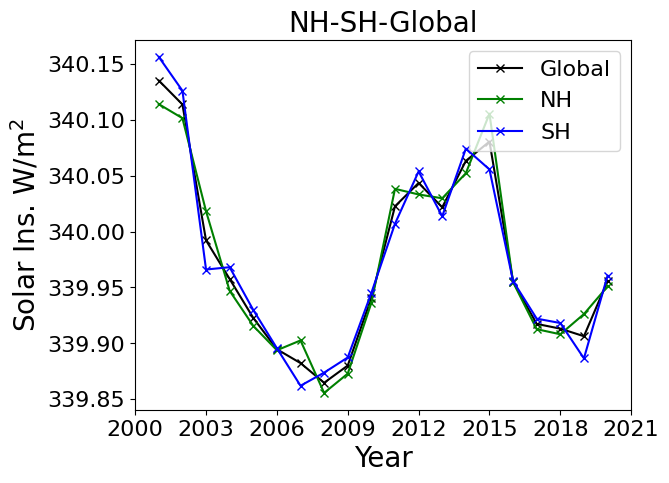

In [48]:
solar_optimal_march = create_hemisphere_data(solar_full_data, start_yr="2001", start_mon="03", 
                end_yr="2022", end_mon="03", time_weighting=1, space_weighting=1, 
                ly_feb=28.44, nly_feb=28.18)
plot_hemisphere_and_global_by_year(solar_optimal_march, solar_optimal_march.year)
mean_squared_error(solar_optimal_march["nh"], solar_optimal_march["sh"])

# May Investigate

In [51]:
grid_search_ly_nly_febs("05", full_depth=True)

Minimum Error is:  0.18562965166338913
Located at: Non-Leap Feb = 27.900000000000006  Leap Year Feb = 29.5
Minimum Error is:  0.17106416059919202
Located at: Non-Leap Feb = 27.95000000000002  Leap Year Feb = 29.45
Minimum Error is:  0.16611670287709474
Located at: Non-Leap Feb = 27.965000000000014  Leap Year Feb = 29.43


0.00035355793918826855

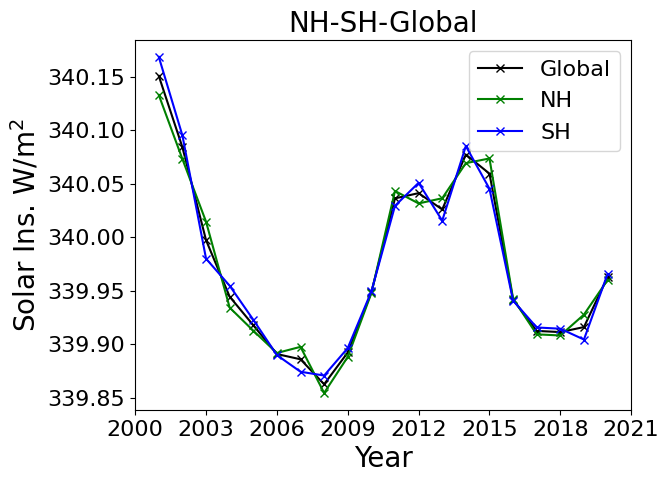

In [63]:
solar_optimal_may = create_hemisphere_data(solar_full_data, start_yr="2001", start_mon="05", 
                end_yr="2022", end_mon="05", time_weighting=1, space_weighting=1, 
                ly_feb=29.8, nly_feb=27.75)
plot_hemisphere_and_global_by_year(solar_optimal_may, solar_optimal_may.year)
mean_squared_error(solar_optimal_may["nh"], solar_optimal_may["sh"])